# Интернет-магазине «Стримчик»

Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и
спланировать рекламные кампании.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Перед нами данные до 2016 года хранящиеся в файле - games.csv

Нам нужно:

    - Подготовить данные к дальнейшему анализу
    - Провести исследовательский анализ данных
    - Составить портрет пользователя каждого региона
    - Проверить гипотезы:
        a) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
        b) Средние пользовательские рейтинги жанров Action и Sports разные.

Импорт библиотек ⬇

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## Откроем файл с данными

Файл - games.csv

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


    Выведим общую информацию по таблице

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


    Построим общую гистограмму

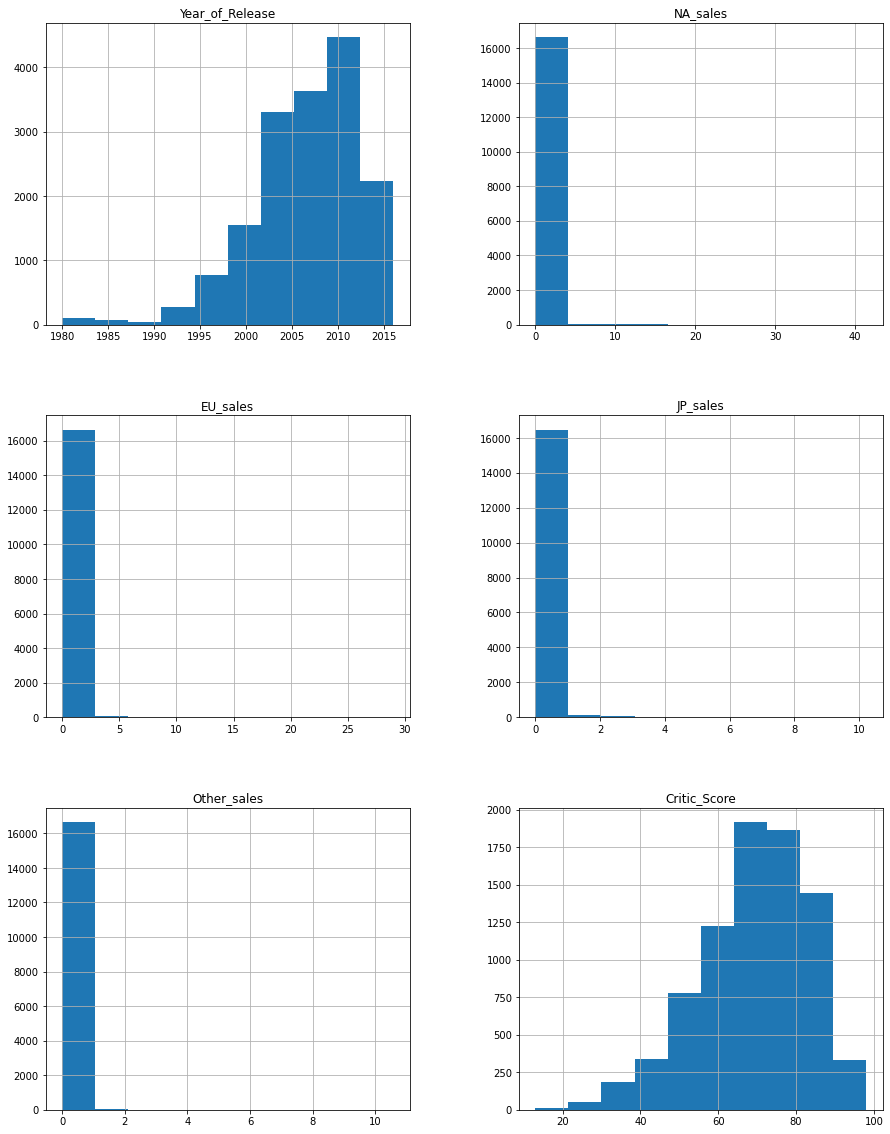

In [4]:
df.hist(figsize=(15,20));

### Мини вывод

Видим что:

    1) даные имеют не большое колличество пропусков
    2) некоторые столбцы имеют неверный тип данных
    3) в последних 3-ёх столбцах больше всего пропусков

## Подготовка данных к анализу

### Приведём к нижнему регистру название столбцов

In [5]:
df.columns = map(str.lower, df.columns)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуем данные в нужный тип

#### Исправим год выпуска - year_of_release
    Удалим строки в которых не указан год выпуска т.к. эти данные могут пагубно отразиться на анализе

In [6]:
df = df.dropna(subset=['year_of_release'])
df=df.reset_index(drop=True)

In [7]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [9]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Исправим оценку пользователей - user_score
    Заменим тип object на float

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
#df['user_score'] = df['user_score'].astype('float')

# Выводит ошибку 
#    ValueError: could not convert string to float: 'tbd'

Посмортим строки с "tbd"

In [12]:
display(df[df['user_score'] == 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
710,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16426,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16428,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16429,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16435,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Загулив что такое TBD пришёл к выводу, что тип столбца изменить не получится т.к. эта аббревиатура означает что пользователи ещё не оставляли оценку данному продукту. Заполнить 0-ми будет некорректно, т.к. оценк со значением _"0"_ так же существуют

Позже в пункте 3.5.2 выясняется что диаграмму рассеяния невозможно сделать с данными типа "str", тогда заменим аббревиатуру "tbd" на нули 0

In [13]:
#df = df.replace({'user_score':{'tbd': 0}})

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'] = df['user_score'].astype('float')

### Обработаем пропуски

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Столбец - name
    Видим 2 пропуска в названии игры. Удалим их

In [15]:
df = df.dropna(subset=['name'])
df=df.reset_index(drop=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


    Последние 3 столбца заполнять будет некорректно т.к. это оценки/рейтинг

#### Столбец - rating

In [17]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [18]:
df['rating'] = df['rating'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Посчитаем суммарные продажи во всех регионах

In [19]:
df['sum_na_sales'] = df['na_sales'].sum()

In [20]:
df['sum_eu_sales'] = df['eu_sales'].sum()

In [21]:
df['sum_jp_sales'] = df['jp_sales'].sum()

In [22]:
df['sum_other_sales'] = df['other_sales'].sum()

In [23]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_na_sales,sum_eu_sales,sum_jp_sales,sum_other_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,4341.42,2399.68,1290.64,782.63
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,4341.42,2399.68,1290.64,782.63
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,4341.42,2399.68,1290.64,782.63
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,4341.42,2399.68,1290.64,782.63
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,4341.42,2399.68,1290.64,782.63


In [24]:
print(df.duplicated().sum())

0


<div class="alert alert-info">
<b>
Мини вывод
    
</b> 
    
    - Привели к нижнему регистру название столбцов
    - Преобразовали данные столбцов в нужный тип:
        1) year_of_release
        2) user_score
    - Обработали пропуски в столбцах:
        1) name
        2) rating
    - Посчитали суммарные продажи во всех регионах
    - Проверили на полные дубликаты
</div>

## Проведём исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


In [25]:
df['all_sum_sales'] = df['sum_na_sales'] + df['sum_eu_sales'] + df['sum_jp_sales'] + df['sum_other_sales']

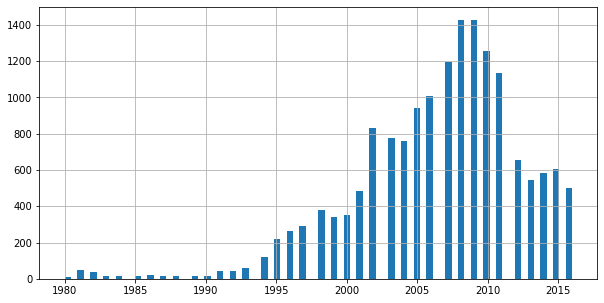

In [26]:
df['year_of_release'].hist(bins=80,figsize=(10,5));

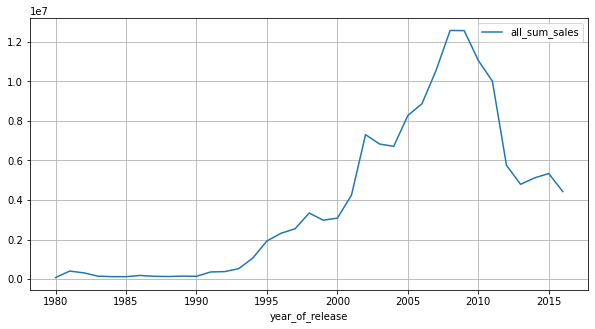

In [27]:
df.pivot_table(index='year_of_release', values='all_sum_sales', aggfunc='sum').plot(grid=True, figsize=(10,5));

In [28]:
c_year = df.pivot_table(index='year_of_release', values='genre', aggfunc='count')
display(c_year.sort_values(by='year_of_release', ascending=False))

,genre
year_of_release,
2016,502
2015,606
2014,581
2013,544
2012,653
2011,1136
2010,1255
2009,1426
2008,1427


    Видим что:
        
        1) Начало активного выпуска игр положено ~ в 1993-1995г.г.
        2) Пик выпуска игр в 2008-2009г.г. - примерно 1420 игр
        3) Резкий спад в 2011-2012г.г. - до примерно 650 игр

Я бы сказал, что все данные важны, ведь интересно сколько игр было сделано до условных 2000-ых 🙃
С другой сотроны игр до 1998 года на столько мало, что в принципи их в дальнейшем анализе можно не рассматривать

### Посмотрим, как менялись продажи по платформам

Создадим столбец показывающий скольо всего игр было купленно

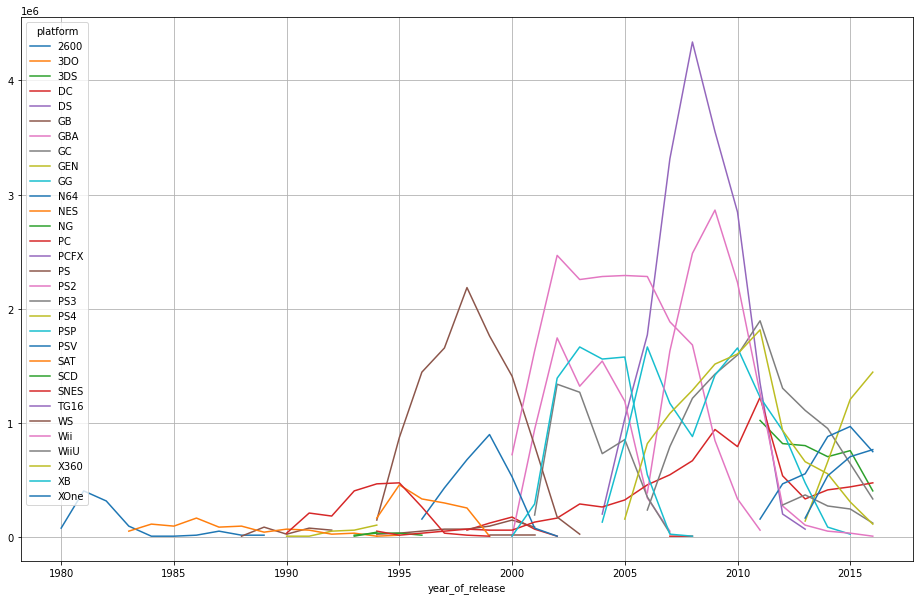

In [30]:
df.pivot_table(index='year_of_release', columns='platform', values='all_sum_sales', aggfunc='sum').plot(grid=True,figsize=(16,10))
plt.show()

Выберем те платформы, которые больше всего имеют продаж

In [44]:
top7 = df.query('platform == ["Wii","DS","X360","PS3","PS2","PS","PC"]')

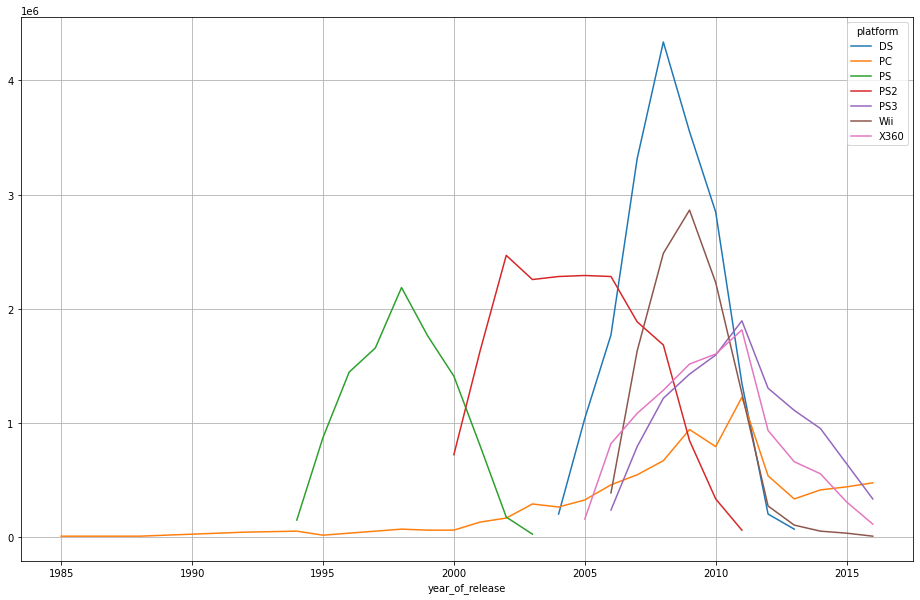

In [45]:
top7.pivot_table(index='year_of_release', columns='platform', values='all_sum_sales', aggfunc='sum').plot(grid=True,figsize=(16,10))
plt.show()

От 5 до 7 лет появляются и счезают различные платформы.

Самой популярной платформой является DS, а самой стабильной и долгоиграющей является PC

PS - первая игровая платформа с большым количеством покупаемых игр

PS3 - появилась позже всех

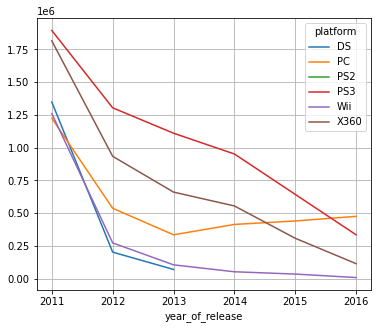

In [46]:
actual_platforms = top7[top7['year_of_release'] >= 2011]
actual_platforms.pivot_table(index='year_of_release', columns='platform', values='all_sum_sales', aggfunc='sum').plot(grid=True,figsize=(6,5))
plt.show()

### Какие платформы лидируют по продажам, растут или падают?

    Выбрав актуальный период 2011-2016г.г. мы можем сделать вывод, что:
        
        1) Лидирующие платформы по продажам являются PS3 и X360
        2) Продажи преимущественно падают
        3) Платформа PC не отличалась большой популярностью, однако начаная с ~ 2013г. популярность плтаформы
        начанает расти

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [47]:
display(actual_platforms.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False))
display(actual_platforms.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False))
display(actual_platforms.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False))
display(actual_platforms.pivot_table(index='platform', values='other_sales', aggfunc='sum').sort_values('other_sales', ascending=False))

,na_sales
platform,
X360,226.80
PS3,168.26
Wii,48.56
PC,29.88
DS,18.86
PS2,0.13


,eu_sales
platform,
PS3,163.10
X360,117.10
PC,56.70
Wii,29.60
DS,9.24
PS2,0.13


,jp_sales
platform,
PS3,49.39
Wii,8.97
DS,8.04
X360,3.35
PS2,0.09
PC,0.00


,other_sales
platform,
PS3,64.82
X360,33.13
PC,11.10
Wii,7.89
DS,2.59
PS2,0.10


In [48]:
top4_actual_platforms = actual_platforms.query('platform == ["X360","PS3","Wii","PC"]')

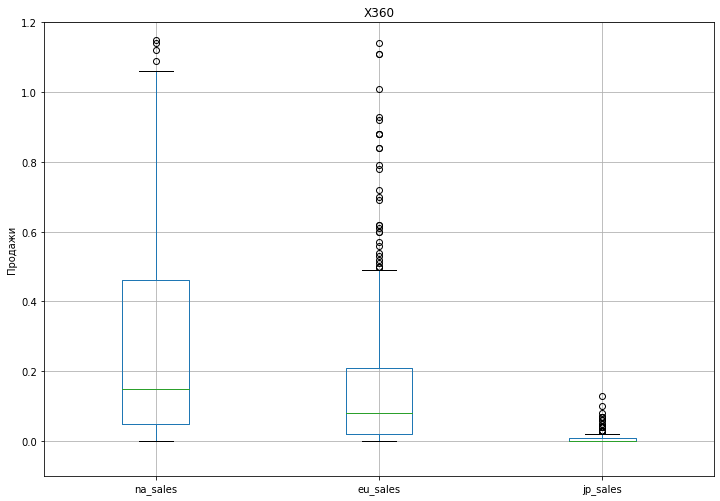

In [49]:
 
top4_actual_platforms.query('platform == "X360"').boxplot(column=['na_sales','eu_sales','jp_sales'], figsize=(12,10))
plt.ylim(-0.1,1.2)
plt.subplots_adjust(bottom=0.25)
plt.title('X360')
plt.ylabel('Продажи')
plt.show()

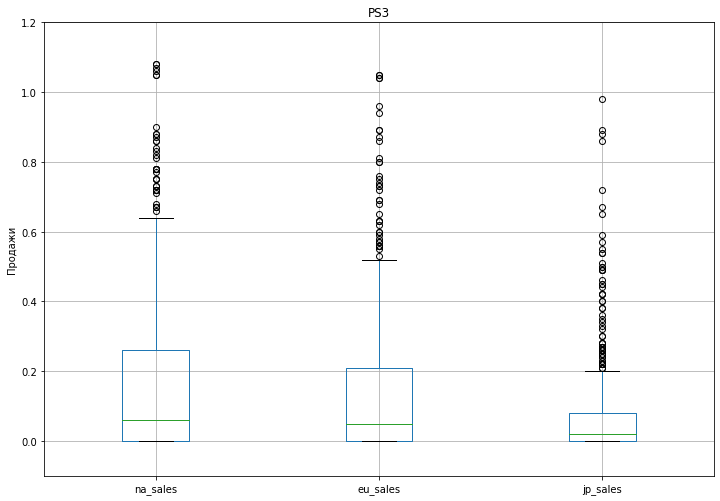

In [50]:
top4_actual_platforms.query('platform == "PS3"').boxplot(column=['na_sales','eu_sales','jp_sales'], figsize=(12,10))
plt.ylim(-0.1,1.2)
plt.subplots_adjust(bottom=0.25)
plt.title('PS3')
plt.ylabel('Продажи') 
plt.show()

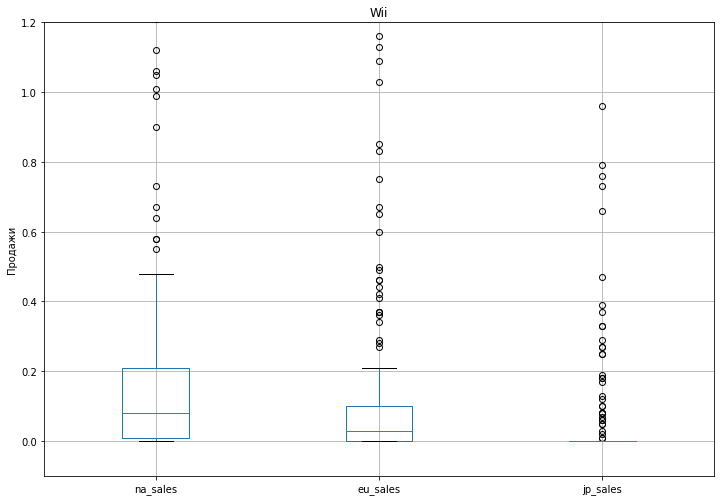

In [51]:
top4_actual_platforms.query('platform == "Wii"').boxplot(column=['na_sales','eu_sales','jp_sales'], figsize=(12,10))
plt.ylim(-0.1,1.2)
plt.subplots_adjust(bottom=0.25)
plt.title('Wii')
plt.ylabel('Продажи') 
plt.show()

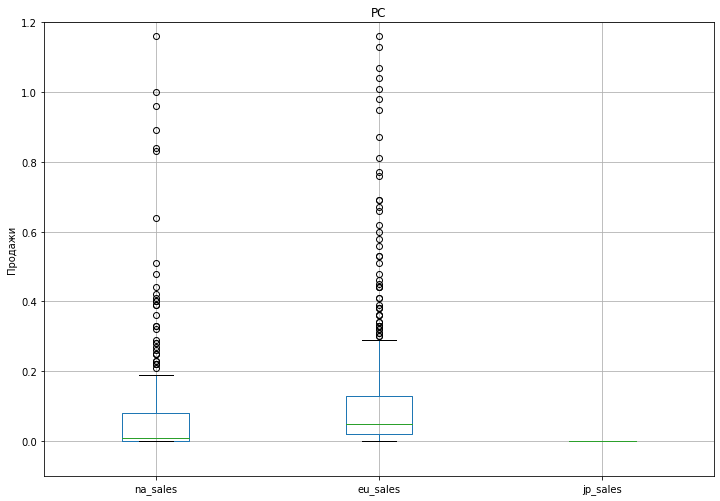

In [52]:
top4_actual_platforms.query('platform == "PC"').boxplot(column=['na_sales','eu_sales','jp_sales'], figsize=(12,10))
plt.ylim(-0.1,1.2)
plt.subplots_adjust(bottom=0.25)
plt.title('PC')
plt.ylabel('Продажи') 
plt.show()

Вими что:
        
    1) платформа DS полностю уходит с рынка в 2013
    2) платформа PC довольно стабильно продаётся с 2011 по 2015г.г., также есть отколнение в 2016 году, что соответсвует
    предыдущему графику - повышение популярности данной платформы
    3) платформа PS3 довольно стабильно продаётся с 2011 по 2014г.г., также есть отколнение в 2016 году, что соответсвует
    предыдущему графику - понижении популярности данной платформы
    4) неплохое количество продаж было у платформы Wii в 2011-2012г.г., но ближе к 2016-му году продажы сократились почти до
    нуля. Есть предположение что в будущем данная платформа полностью уйдёт с рынка
    5) платформа X360 имеет тенденции как у платформы Wii, но активно продовалось чуть дольше - 2011-2013г.г.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [53]:
actual_platforms.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_na_sales,sum_eu_sales,sum_jp_sales,sum_other_sales,all_sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,4341.42,2399.68,1290.64,782.63,8814.37
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,4341.42,2399.68,1290.64,782.63,8814.37
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,4341.42,2399.68,1290.64,782.63,8814.37


In [54]:
actual_PS3 = actual_platforms[actual_platforms['platform'] == 'PS3']
actual_PS3.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_na_sales,sum_eu_sales,sum_jp_sales,sum_other_sales,all_sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,4341.42,2399.68,1290.64,782.63,8814.37
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,4341.42,2399.68,1290.64,782.63,8814.37
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,4341.42,2399.68,1290.64,782.63,8814.37


#### Оценка критиков

##### Северная Америка

Text(0, 0.5, 'na_sales')

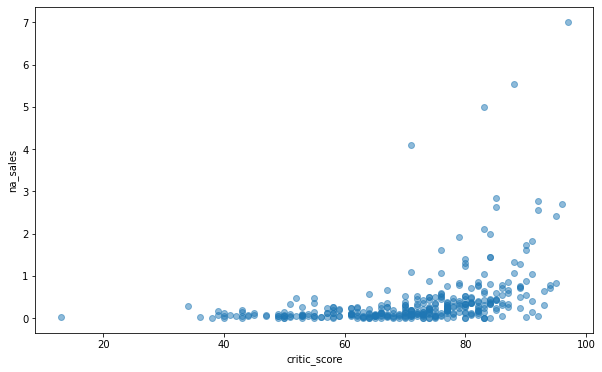

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = actual_PS3['critic_score'], y = actual_PS3['na_sales'], alpha = 0.5);
plt.xlabel("critic_score")
plt.ylabel("na_sales")

In [56]:
print('Корреляция равна:', actual_PS3['critic_score'].corr(actual_PS3['na_sales']).round(2))

Корреляция равна: 0.4


##### Европа

Text(0, 0.5, 'eu_sales')

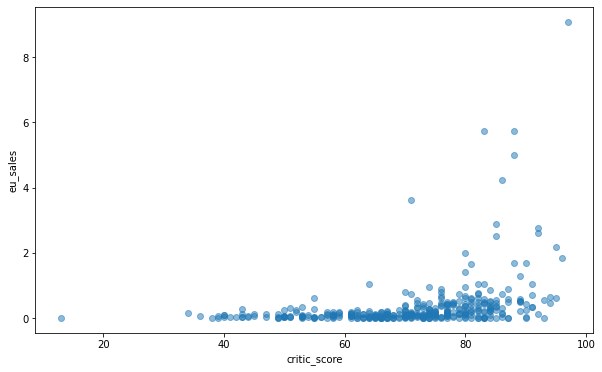

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = actual_PS3['critic_score'], y = actual_PS3['eu_sales'], alpha = 0.5);
plt.xlabel("critic_score")
plt.ylabel("eu_sales")

In [58]:
print('Корреляция равна:', actual_PS3['critic_score'].corr(actual_PS3['eu_sales']).round(2))

Корреляция равна: 0.34


##### Япония

Text(0, 0.5, 'jp_sales')

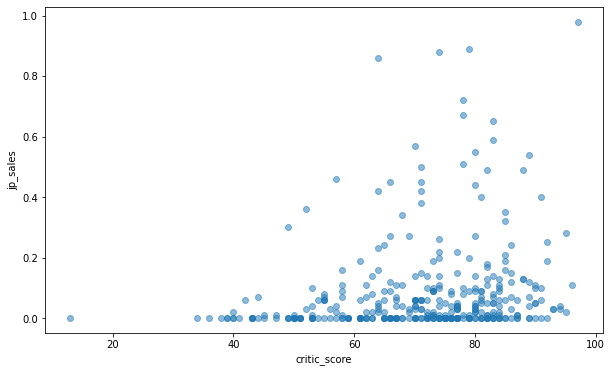

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = actual_PS3['critic_score'], y = actual_PS3['jp_sales'], alpha = 0.5);
plt.xlabel("critic_score")
plt.ylabel("jp_sales")

In [60]:
print('Корреляция равна:', actual_PS3['critic_score'].corr(actual_PS3['jp_sales']).round(2))

Корреляция равна: 0.2


##### другие

Text(0, 0.5, 'other_sales')

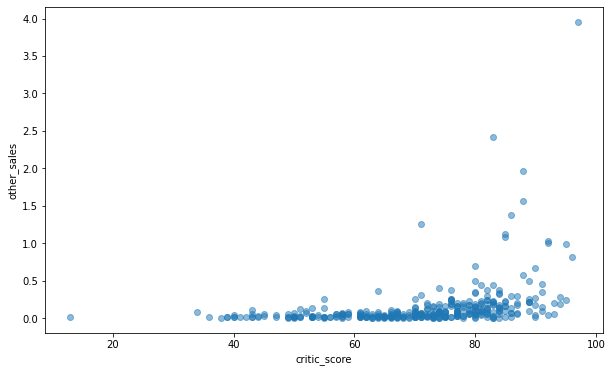

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = actual_PS3['critic_score'], y = actual_PS3['other_sales'], alpha = 0.5);
plt.xlabel("critic_score")
plt.ylabel("other_sales")

In [62]:
print('Корреляция равна:', actual_PS3['critic_score'].corr(actual_PS3['other_sales']).round(2))

Корреляция равна: 0.35


    Видим что большинство критиков во всех 4-ёх таблицах примерно оценивают игры на 60-80 баллов
    
    Очень малая часть критиков оценили игры на мение чем 40-50 баллов

<div class="alert alert-info">
<b>
Прямой зависимость полпулярности игр от отзывов критиков найти не удалось
</b> 
</div>

#### Оценка пользователей

##### Северная Америка

Ниже выясняется что диаграмму рассеяния невозможно сделать с данными типа "str", тогда заменим аббревиатуру "tbd" на нули _0_ 

In [63]:
#actual_PS3 = actual_PS3.replace({'user_score':{'tbd': 0}})
#actual_PS3['user_score'] = actual_PS3['user_score'].astype('float')

Text(0, 0.5, 'na_sales')

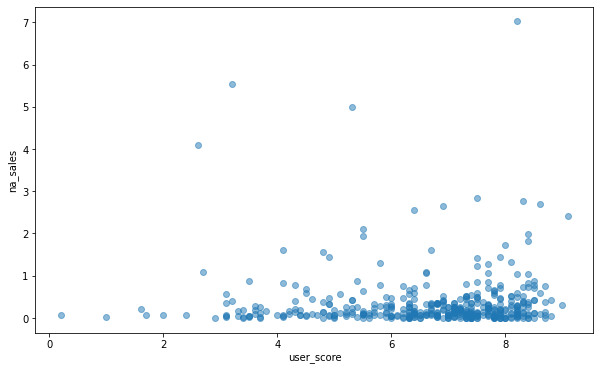

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = actual_PS3['user_score'], y = actual_PS3['na_sales'], alpha = 0.5);
plt.xlabel("user_score")
plt.ylabel("na_sales")

In [65]:
print('Корреляция равна:', actual_PS3['user_score'].corr(actual_PS3['na_sales']).round(2))

Корреляция равна: 0.01


##### Европа

Text(0, 0.5, 'eu_sales')

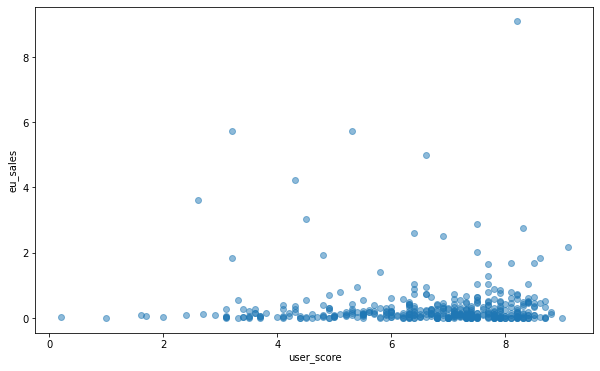

In [66]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = actual_PS3['user_score'], y = actual_PS3['eu_sales'], alpha = 0.5);
plt.xlabel("user_score")
plt.ylabel("eu_sales")

In [67]:
print('Корреляция равна:', actual_PS3['user_score'].corr(actual_PS3['eu_sales']).round(2))

Корреляция равна: -0.01


##### Япония

Text(0, 0.5, 'jp_sales')

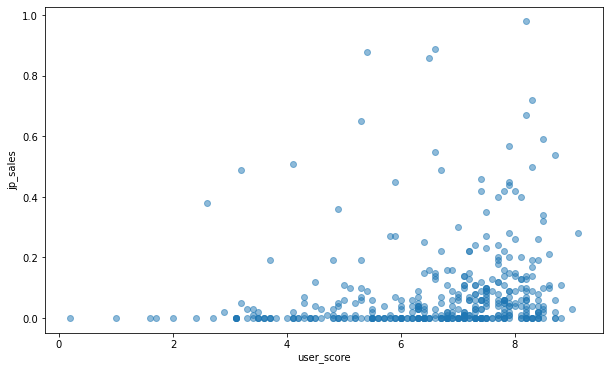

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = actual_PS3['user_score'], y = actual_PS3['jp_sales'], alpha = 0.5);
plt.xlabel("user_score")
plt.ylabel("jp_sales")

In [69]:
print('Корреляция равна:', actual_PS3['user_score'].corr(actual_PS3['jp_sales']).round(2))

Корреляция равна: 0.17


##### другие

Text(0, 0.5, 'other_sales')

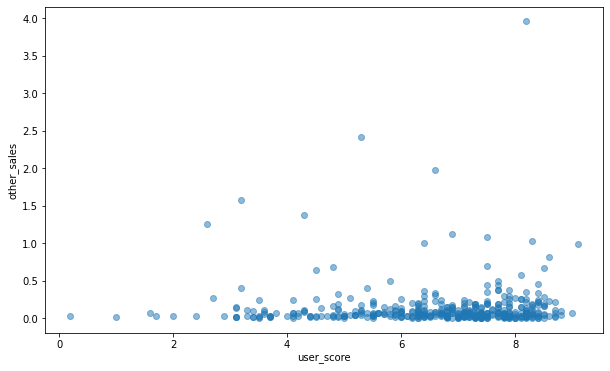

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = actual_PS3['user_score'], y = actual_PS3['other_sales'], alpha = 0.5);
plt.xlabel("user_score")
plt.ylabel("other_sales")

In [71]:
print('Корреляция равна:', actual_PS3['user_score'].corr(actual_PS3['other_sales']).round(2))

Корреляция равна: 0.01


    Видим что большинство пользователей во всех 4-ёх таблицах примерно оценивают игры на 60-70 баллов
    При это у пользователей уже не так прослеживается тенденция - чем больше проданных игр тем лучше оценка

### Посмотрим на общее распределение игр по жанрам

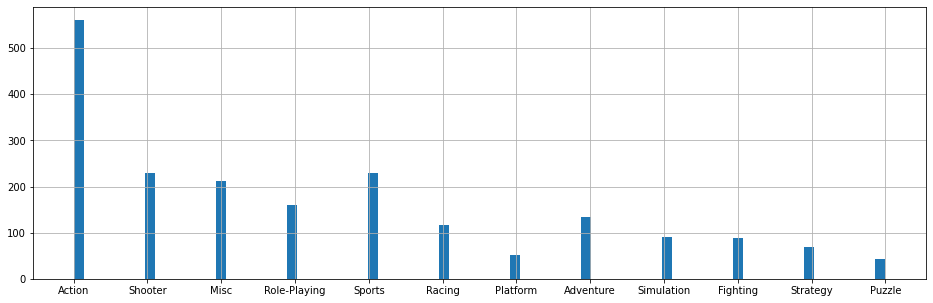

In [72]:
actual_platforms['genre'].hist(bins=80,figsize=(16,5));

In [73]:
actual_platforms.pivot_table(index="genre",values='na_sales',aggfunc='median').sort_values('na_sales',ascending=False).head(6)

,na_sales
genre,
Shooter,0.150
Misc,0.085
Action,0.080
Platform,0.080
Sports,0.080
Fighting,0.070


In [74]:
actual_platforms_top_genre = actual_platforms.query('genre == ["Shooter","Misc","Action","Platform","Sports","Fighting"]')

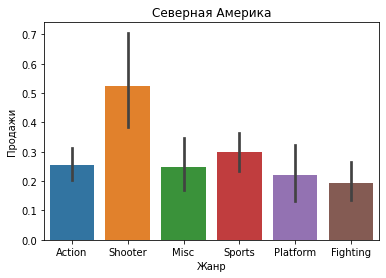

In [75]:

ax = sns.barplot(x='genre',
            y='na_sales',
            data=actual_platforms_top_genre)
ax.set_title('Северная Америка')
ax.set(xlabel='Жанр', ylabel='Продажи');

    Самой популярной платформой является - Shoter
    Выделяются жанры с низкими продажами такие как: Fighting

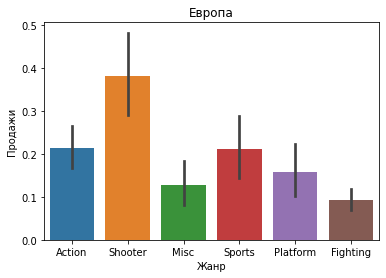

In [76]:
ax = sns.barplot(x='genre',
            y='eu_sales',
            data=actual_platforms_top_genre)
ax.set_title('Европа')
ax.set(xlabel='Жанр', ylabel='Продажи');

    Самой популярной платформой является - Shoter
    Выделяются жанры с низкими продажами такие как: Fighting, Misc

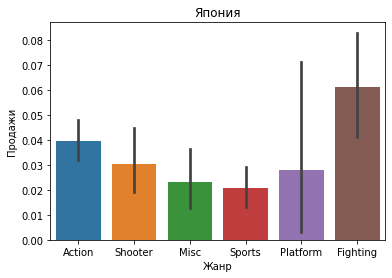

In [77]:
ax = sns.barplot(x='genre',
            y='jp_sales',
            data=actual_platforms_top_genre)
ax.set_title('Япония')
ax.set(xlabel='Жанр', ylabel='Продажи');

    Самой популярной платформой является - Fighting
    Выделяются жанры с низкими продажами такие как: Sports, Misc

    Проведя анализ, мы можем выделить 4 перспективных жанра:
        - Action
        - Shooter
        - Sports
        - Platform как одну из самых стабильных

## Составим портрет пользователя каждого региона

### Определим для пользователей  топ-5 самых популярных платфор

#### Северной Америки

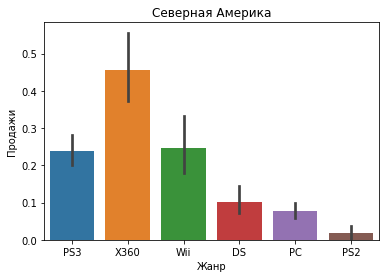

In [78]:
ax = sns.barplot(x='platform',
            y='na_sales',
            data=actual_platforms)
ax.set_title('Северная Америка')
ax.set(xlabel='Жанр', ylabel='Продажи');

    Самыми популярными платформами являются: X360, PS3, Wii, DS, PC

#### Европы

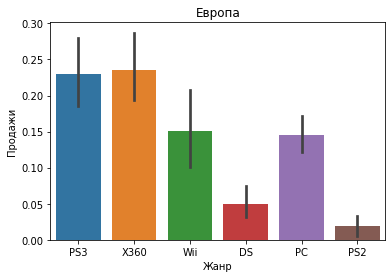

In [79]:
ax = sns.barplot(x='platform',
            y='eu_sales',
            data=actual_platforms)
ax.set_title('Европа')
ax.set(xlabel='Жанр', ylabel='Продажи');

    Самыми популярными платформами являются: X360, PS3, Wii, PC, DS

#### Японии

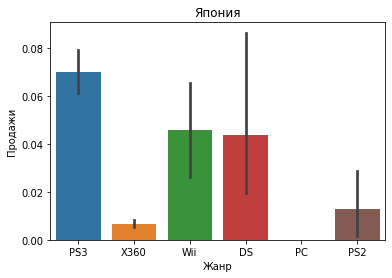

In [80]:
ax = sns.barplot(x='platform',
            y='jp_sales',
            data=actual_platforms)
ax.set_title('Япония')
ax.set(xlabel='Жанр', ylabel='Продажи');

    Самыми популярными платформами являются: PS3, Wii, DS, PS2, X360

### Определим для пользователей  топ-5 самых популярных жанров

#### Северной Америки

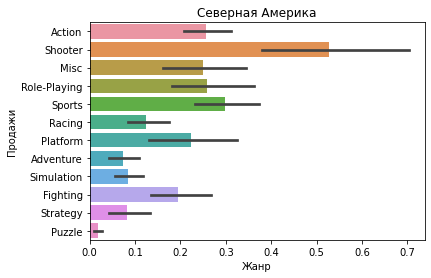

In [81]:
ax = sns.barplot(x='na_sales',
            y='genre',
            data=actual_platforms)
ax.set_title('Северная Америка')
ax.set(xlabel='Жанр', ylabel='Продажи');

    Самыми популярными жанрами являются: Shooter, Sports, Role_Playing, Action, Misc

#### Европы

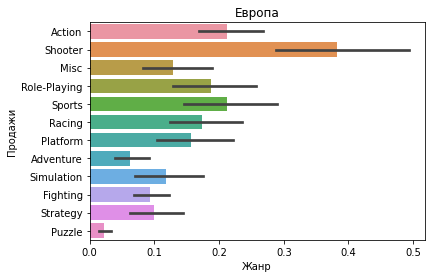

In [82]:
ax = sns.barplot(x='eu_sales',
            y='genre',
            data=actual_platforms)
ax.set_title('Европа')
ax.set(xlabel='Жанр', ylabel='Продажи');

    Самыми популярными жанрами являются: Shooter, Sports, Action, Role_Playing, Racing

#### Японии

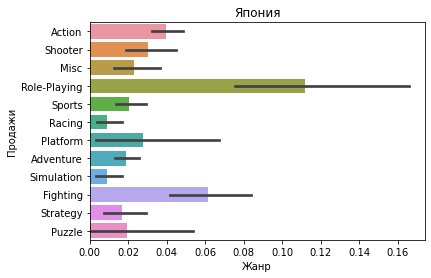

In [83]:
ax = sns.barplot(x='jp_sales',
            y='genre',
            data=actual_platforms)
ax.set_title('Япония')
ax.set(xlabel='Жанр', ylabel='Продажи');

    Самыми популярными жанрами являются: Role_Playing, Fighting, Action, Shooter, Platform

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

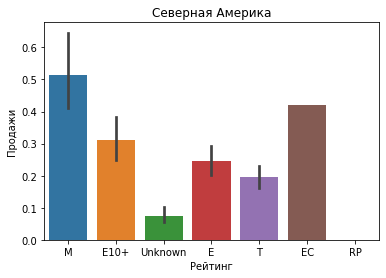

In [84]:
ax = sns.barplot(x='rating',
            y='na_sales',
            data=actual_platforms)
ax.set_title('Северная Америка')
ax.set(xlabel='Рейтинг', ylabel='Продажи');

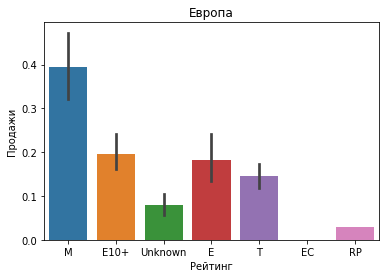

In [85]:
ax = sns.barplot(x='rating',
            y='eu_sales',
            data=actual_platforms)
ax.set_title('Европа')
ax.set(xlabel='Рейтинг', ylabel='Продажи');

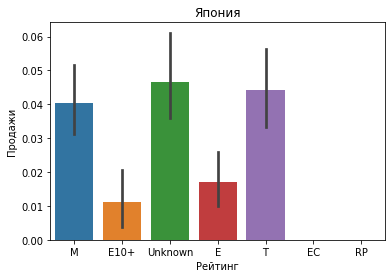

In [86]:
ax = sns.barplot(x='rating',
            y='jp_sales',
            data=actual_platforms)
ax.set_title('Япония')
ax.set(xlabel='Рейтинг', ylabel='Продажи');

    Выяснилось что оценка рейтинга ESRB влияет на продажи:
        - Так, рейтинг EC довольно хорошо продаётся в Америке в отличие от других регионов
        - Рейтинг T довольно хорошо продавался в Японии, также в Японии довольно много продаж с неизвестным рейтингом.
        - Рейтинг RP продаётся только в Европе в малых количествах.

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [87]:
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_na_sales,sum_eu_sales,sum_jp_sales,sum_other_sales,all_sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,4341.42,2399.68,1290.64,782.63,8814.37
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,4341.42,2399.68,1290.64,782.63,8814.37
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,4341.42,2399.68,1290.64,782.63,8814.37


    Ниже для проверки гипотезы и адекватного работы кода нам понадобится удалить строки с пропущенными данными в столбце
    user_score

In [88]:
#удалили строки с пропусками в столбце user_score
test_sdta = df.dropna(subset=['user_score'])
test_sdta=test_sdta.reset_index(drop=True)

In [89]:
xone_pc = test_sdta.query('platform == ["XOne", "PC"]').pivot_table(index='platform', values='user_score').round(2)
display(xone_pc)

,user_score
platform,
PC,7.07
XOne,6.52


In [90]:
xone_pc_prt = ((xone_pc.loc['XOne', 'user_score'] * 100 / xone_pc.loc['PC', 'user_score']) - 100) * -1
print(f'На {xone_pc_prt.round(2)}% различаются платформы')

На 7.78% различаются платформы


    H_0: Средние пользовательские рейтинги (user_score) платформы "Xbox One" = рейтингу (user_score) платформы "PC"
    
    H_1: Средние пользовательские рейтинги (user_score) платформы "Xbox One" = рейтингу (user_score) платформы "PC"

In [91]:
results = st.ttest_ind(
    test_sdta.loc[test_sdta.platform != 'XOne', 'user_score'],
    test_sdta.loc[test_sdta.platform != 'PC', 'user_score'], 
    equal_var=False)

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.7425053143535052
Не получилось отвергнуть нулевую гипотезу


    Средний пользовательский рейтинг различается на 7,8%.
    
    Применив тест Стьюдента, который нам показал, что опровергнуть гипотезу не возможно, мы можем сделать вывод что
    пользовательские рейтинги между платформами Xbox One и PC одинаковые. Гипотеза - не опровергнута.

### Средние пользовательские рейтинги жанров Action и Sports разные

In [92]:
action_sport = test_sdta.query('genre == ["Action", "Sports"]').pivot_table(index='genre', values='user_score').round(2)
display(action_sport)

,user_score
genre,
Action,7.06
Sports,6.95


In [93]:
action_sport_prt = ((action_sport.loc['Sports', 'user_score'] * 100 / action_sport.loc['Action', 'user_score']) - 100) * -1
print(f'На {action_sport_prt.round(2)}% различаются жанры')

На 1.56% различаются жанры


    H_0: Средние пользовательские рейтинги (user_score) жанра "Action" = рейтингу (user_score) жанра "Sports"
    
    H_1: Средние пользовательские рейтинги (user_score) жанра "Action" ≠ рейтингу (user_score) жанра "Sports"

In [94]:
results = st.ttest_ind(
    test_sdta.loc[test_sdta.genre == 'Action', 'user_score'],
    test_sdta.loc[test_sdta.genre == 'Sports', 'user_score'], 
    equal_var=False)

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.07370217419278526
Не получилось отвергнуть нулевую гипотезу


    Средний пользовательский рейтинг различается на 1,6%.
    
    Применив тест Стьюдента, который нам показал, что опровергнуть гипотезу возможно, мы можем сделать вывод что
    пользовательские рейтинги между жанрами Action и Sports одинаковые. Гипотеза - не опровергнута.

## Вывод

<div class="alert alert-info">
<b>Общий вывод</b>
<br>- Был открыт и изучен файл games.csv от интернет-магазина «Стримчик»
<br>- После анализа имеющихся данных было выявленно:
    
    1) даные имеют не большое колличество пропусков
    2) некоторые столбцы имеют неверный тип данных
    3) в последних 3-ёх столбцах больше всего пропусков
<br>- Проведя предобработку данных мы:
    
    1) привили к нижнему регистру название столбцов
    2) преобразовали данные в нужный тип
    3) исправили неверные типы данных
    4) обработали пропуски
    5) посчитали суммарные продажи во всех регионах
<br>- Проведя исследовательский анализ данных мы выяснили что:
    
    1) больше всего игр продавалось с 2005 по 2010 г.г.
    2) выбрали актуальный период 2011-2016г.г.:
        - лидирующие платформы по продажам являются PS3 и X360
        - продажи преимущественно падают
        - платформа PC не отличалась большой популярностью, однако начиная с ~ 2013г. популярность плтаформы
        начинает расти
    2) нашли 4 наиболее актуальные и перспективные платформы
        - X360
        - PS3
        - Wii
        - PC
    3) зависимость популярности игр от отзывов критиков найти не удалось
<br>- Составили портрет пользователя каждого региона
    
    1) Северная Америка:
        - самыми популярными платформами являются: X360, PS3, Wii, DS, PC
        - самыми популярными жанрами являются: Shooter, Sports, Role_Playing, Action, Misc
    2) Европа:
        - самыми популярными платформами являются: X360, PS3, Wii, PC, DS
        - самыми популярными жанрами являются: Shooter, Sports, Action, Role_Playing, Racing
    3) Япония:
        - самыми популярными платформами являются: PS3, Wii, DS, PS2, X360
        - Самыми популярными жанрами являются: Role_Playing, Fighting, Action, Shooter, Platform
    4) оценка рейтинга ESRB влияет на продажи:
        - так, рейтинг EC довольно хорошо продаётся в Америке в отличие от других регионов
        - рейтинг T довольно хорошо продавался в Японии, также в Японии довольно много продаж с неизвестным рейтингом.
        - рейтинг RP продаётся только в Европе в малых количествах.
<br>- Проверили 2 гипотезы:
    
    1) cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
        - после анализа и теста было выясненно, что:
            - средний пользовательский рейтинг различается на 7,8%
            - пользовательские рейтинги между платформами Xbox One и PC одинаковые. Гипотеза - не опровергнута.
    2) cредние пользовательские рейтинги жанров Action и Sports разные
        - после анализа и теста было выясненно, что:
            - средний пользовательский рейтинг различается на 1,6%.
            - пользовательские рейтинги между жанрами Action и Sports одинаковые. Гипотеза - не опровергнута.
</div>